In [1]:
from IPython.display import IFrame, Image, HTML, display, YouTubeVideo

# Spatial Weights and Correlations

*Space-Time Analytics — Lecture 3*

* **Prof. Carson J. Q. Farmer**  
    <i class="fa-fw fa fa-twitter"></i> [@carsonfarmer](https://twitter.com/carsonfarmer)  
    <i class="fa-fw fa fa-globe"></i> [carsonfarmer.com](https://carsonfarmer.com)  
    <i class="fa-fw fa fa-envelope-o"></i> [carson.farmer@colorado.edu](mailto:carson.farmer@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/carsonfarmer](https://github.com/carsonfarmer)  
    <i class="fa-fw fa fa-briefcase"></i> Guggenheim Building Room 207  
    <i class="fa-fw fa fa-clock-o"></i> Wednesdays 2:00-3:00 PM and 4:15-5:15 PM  

## Today

* This week's student presentations  
    <i class="fa-fw fa fa-search"></i> [Exploratory Analysis](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.648.9094&rep=rep1&type=pdf)  
    <i class="fa-fw fa fa-question"></i> Ask questions!  
* Learning stuff...  
    <i class="fa-fw fa fa-clock-o"></i> Quick review of *temporal dependence*  
    <i class="fa-fw fa fa-globe"></i> Extending dependence to **2** *dimensions*  
* Some thoughts on 'near' or 'close' in space and time

## Student Presentation

[**Exploratory Space-Time Analysis**](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.648.9094&rep=rep1&type=pdf)

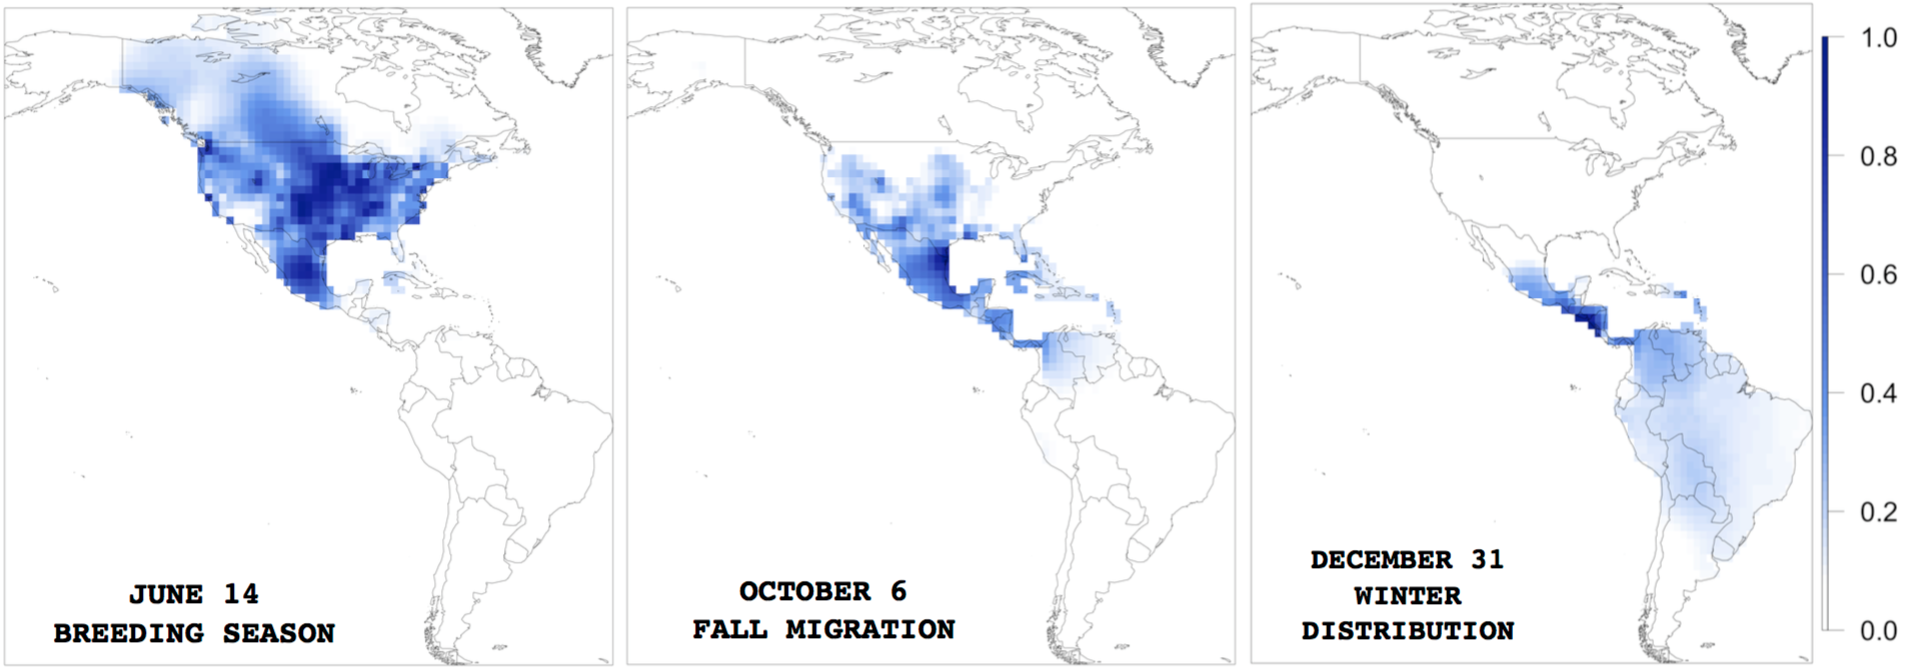

In [2]:
display(Image("images/presentation1.png", width=800, embed=True))

## Last time, on Space-Time Analytics...

* Stationarity
* Transformations
* Smoothing
* Auto-Correlations
* Serial Dependence
* Testing for Serial Correlation...

## Extending Dependence to 2D

* Already talked about **special** *issues with spatial data*
    * Scale
    * Aggregation
    * Dependence
* Many concepts/methods/ideas link directly to temporal/serial data

## Dependencies Between Observations

* Serial $\rightarrow$ Spatial $\rightarrow$ Autocorrelation
    > Everything is related to everything else, but *near* things are more related than *distant* things

## Spatial Variables

* Denote some outcome $Y$ at location $s$ within region $R$ as
$$
\{Y(s), s \in R\}
$$
* Where the expected value of $Y$ at location $s$ is
$$
\textrm{E}\{Y(s)\} = \mu(s)
$$
* And the variance is:
$$
\textrm{Var}\{Y(s)\} = \sigma^2(s)
$$

## Spatial Stationarity

* A map is said to be stationary if
$$
\mu(s) = \mu \\
\sigma(s) = \sigma
$$
* In other words...
    * Mean and variance are **constant** within the region $R$
* When these conditions are met...
    * **Covariance** between locations $s_i$, and $s_j$ is simply function of distance

## Spatial Structure

* This is the exact same idea as in time-series...
    * Except in *spatial statistics* spatial dependence is conceptualized as a function of *nearness* in space rather than *time*

## Spatial Dependence

* No single way to describe spatial dependence
    * Focusing on spatial structure can give more *insight* – but not answers...
* Variogram
    * Describes spatial structure
    * We'll see this later
* Examining correlation as a function of distance would be intuitive...
    * What about when 'distance' isn't a good *lag* metric?

## But First

* Some boilerplate code:

In [3]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

## Spatial Relationships

* To measure *spatial autocorrelation* we need a way to mathematically represent spatial relationships
* Everything on map has *some* kind of spatial relationship with everything else
    * Consider a mileage chart....

## Largest 1000 cities in US

In [4]:
base = "https://gist.githubusercontent.com/Miserlou/c5cd8364bf9b2420bb29/raw/"
file = "2bf258763cdddd704f8ffd3ea9a3e81d25e2c6f6/cities.json"
cities = pd.read_json(base + file)  # Largest 1000 cities in US with lat/long
colorado = cities[(cities.state == "Colorado") &
                  (cities.population > 100000)]  # Just grab ones in Colorado

In [5]:
# Compute a distance 'matrix'
from scipy.spatial.distance import pdist, squareform
dists = squareform(pdist(colorado[["latitude", "longitude"]]))
dists = pd.DataFrame(dists, index=colorado.city, columns=colorado.city)

## Let's Take a Look

In [6]:
dists

city,Denver,Colorado Springs,Aurora,Fort Collins,Lakewood,Thornton,Arvada,Westminster,Pueblo,Centennial,Boulder
city,,,,,,,,,,,
Denver,0.000000,0.920972,0.158635,0.851249,0.097444,0.130103,0.116147,0.108142,1.532919,0.194695,0.393196
Colorado Springs,0.920972,0.000000,0.895613,1.771024,0.908816,1.045062,1.004766,1.025738,0.617076,0.748946,1.263634
Aurora,0.158635,0.895613,0.000000,0.892300,0.250676,0.197012,0.265878,0.231599,1.491714,0.155421,0.523387
Fort Collins,0.851249,1.771024,0.892300,0.000000,0.880556,0.725988,0.782502,0.750095,2.378777,1.025672,0.599879
Lakewood,0.097444,0.908816,0.250676,0.880556,0.000000,0.196612,0.098245,0.139140,1.525210,0.238883,0.363397
Thornton,0.130103,1.045062,0.197012,0.725988,0.196612,0.000000,0.132722,0.072434,1.653873,0.302518,0.332817
Arvada,0.116147,1.004766,0.265878,0.782502,0.098245,0.132722,0.000000,0.060634,1.620524,0.305816,0.280267
Westminster,0.108142,1.025738,0.231599,0.750095,0.139140,0.072434,0.060634,0.000000,1.639089,0.301826,0.293685
Pueblo,1.532919,0.617076,1.491714,2.378777,1.525210,1.653873,1.620524,1.639089,0.000000,1.353110,1.880679


## Spatial Weights Matrix

* We represent the spatial relationships using a matrix
* A matrix is essentially a table, like a mileage chart, that has rows and columns
    * The most common weights matrix is a connectivity matrix (also called a contiguity matrix)
    * Uses an indicator/dummy variable to measure connections between areas
* The weights matrix is how we define 'near' values

## Measuring Spatial Autocorrelation

$$
w_{ij} = 
\begin{cases}
1, \textrm{if regions } i \textrm{ and } j \textrm{ share a boundary}\\
0, \textrm{otherwise}
\end{cases}
$$

<br/>
<center>
sim$_{ij}$ = similarity between $i$ and $j$
</center>

* Together describes **neighborness** and **similarity**
$$
w_{ij}\textrm{sim}_{ij}
$$

## Spatial Autocorrelation

* Steps in determining the extent of spatial autocorrelation in your data:

1. Choose a neighborhness criterion
    * Which areas are linked?
2. Assign weights to the areas that are linked
    * Create a spatial weights matrix
3. Calculate a statistic
    * Using weights matrix to examine spatial autocorrelation

## Spatial Weights Matrices

* Neighborhoods can be defined in a number of ways
    * Contiguity (common boundary)
        * What is a “shared” boundary?
    * Distance (distance band, K-nearest neighbors)
        * How many 'neighbors' to include
        * What distance do we use?
    * General weights (social distance, distance decay)

## Anselin Talks About Weights

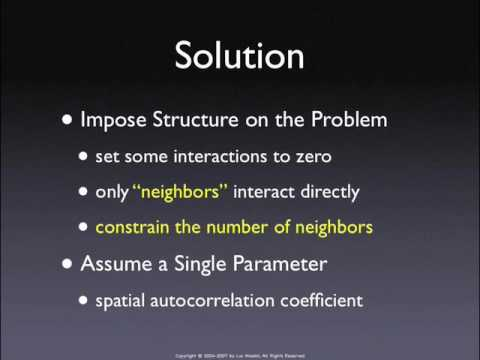

In [7]:
display(YouTubeVideo("ydFmI6ZGLQ8"))

## Common Weights Measures

* Most common is using binary connectivity based on contiguity
    * $w_{ij} = 1$ if regions $i$ and $j$ are contiguous, $w_{ij} = 0$ otherwise  
* May also be defined as *function of distance* between $i$ and $j$
    * Distance of the line connecting centroids of two areas?

## PySAL for the Win

* PySAL — Python Spatial Analysis Library
* Has tools for pretty much *any* type of spatial statistical analysis
    * Including building weights matrices and computing spatial autocorrelation

In [8]:
import pysal as ps
path = ps.examples.get_path("sids2.shp")
sids = ps.pdio.read_files(path)  # Data frame

</div>
<div class="alert alert-info">
In a Jupyter notebook, you can display the HTML docs for a dataset from PySAL with something like the following:
</div>
```
display(HTML(open(ps.examples.get_path("sids2.html"), "r").read()))
```

## Quick and Dirty Plots with PySAL

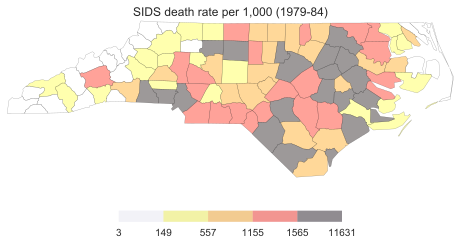

In [9]:
from pysal.contrib.viz import mapping as maps
maps.plot_choropleth(path, sids.NWBIR79, 'quantiles',
    title="SIDS death rate per 1,000 (1979-84)")

## Contiguity based neighbors

* Counties sharing any boundary point (*queen*) are taken as neighbors:

In [10]:
qW = ps.queen_from_shapefile(path)

* Can also define contiguity as counties sharing *more* than one boundary point (*rook*):

In [11]:
rW = ps.rook_from_shapefile(path)

## Let's Take a Look

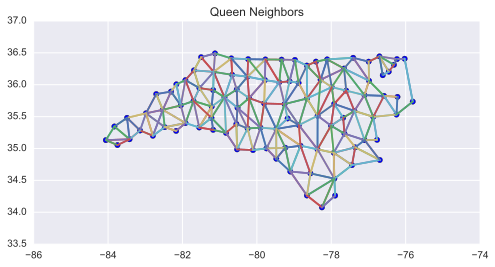

In [12]:
# Plot queen neighborhood graph
centroids = np.array([list(poly.centroid) for poly in sids.geometry])
plt.scatter(centroids[:,0], centroids[:,1], s=30)
for k, neighs in qW.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Queen Neighbors')
plt.show()

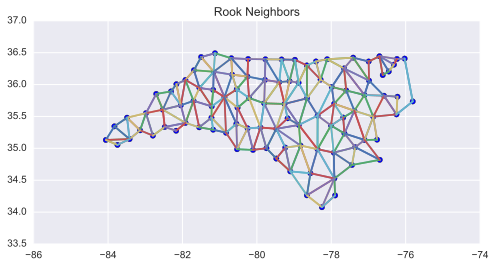

In [13]:
# Plot rook neighborhood graph
plt.scatter(centroids[:,0], centroids[:,1], s=30)
for k, neighs in rW.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Rook Neighbors')
plt.show()

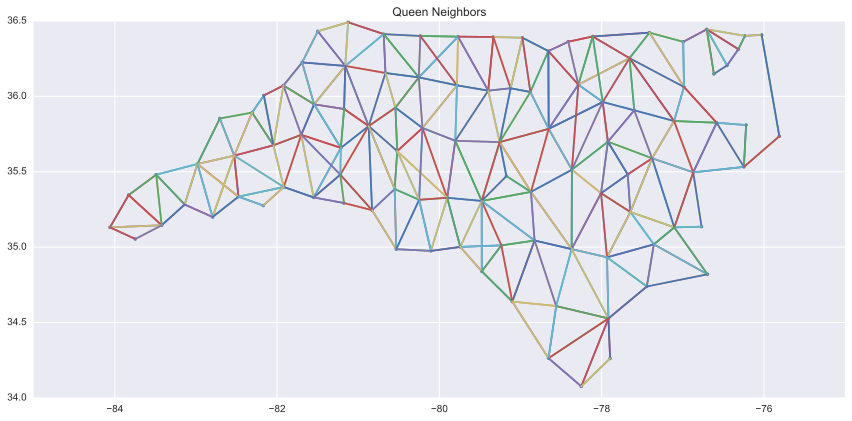

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(centroids[:,0], centroids[:,1], ".")
for k, neighs in qW.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Queen Neighbors')
plt.tight_layout()
plt.show()

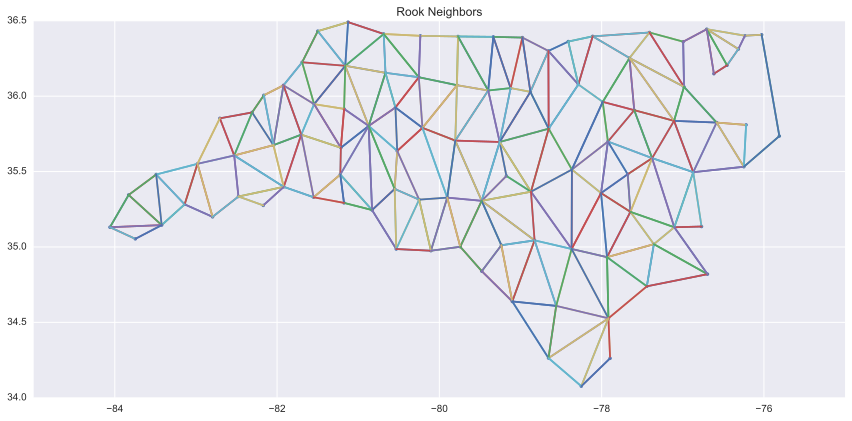

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(centroids[:,0], centroids[:,1], ".")
for k, neighs in rW.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Rook Neighbors')
plt.tight_layout()

## Distance-Based 
### k-Nearest Neighbors

Can also choose the k nearest points as neighbors

In [16]:
radius = ps.cg.sphere.RADIUS_EARTH_MILES  # Account for curvature of earth!
knn2 = ps.knnW_from_shapefile(path, k=2, radius=radius)
knn4 = ps.knnW_from_shapefile(path, k=4, radius=radius)

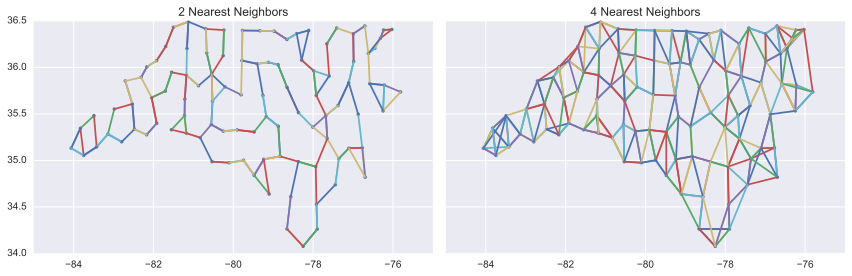

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
# plt.sub(figsize=(12, 6))
# KNN 2
ax1.plot(centroids[:,0], centroids[:,1], ".")
for k, neighs in knn2.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        ax1.plot(segment[:,0], segment[:,1], '-')
ax1.set_title('2 Nearest Neighbors')

# KNN 4
ax2.plot(centroids[:,0], centroids[:,1], ".")
for k, neighs in knn4.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        ax2.plot(segment[:,0], segment[:,1], '-')
ax2.set_title('4 Nearest Neighbors')


plt.tight_layout()
plt.show()

## Distance based neighbors

### Specified distance

* Can also assign neighbors based on a specified distance
* I think you get the point at this stage... so one last plot!

In [18]:
# Find the largest nearest neighbor distance between centroids
threshold = ps.min_threshold_dist_from_shapefile(path, radius=radius) # Decimal degrees
mW = ps.threshold_binaryW_from_shapefile(path, radius=radius, threshold=threshold)

Island id:  [56]


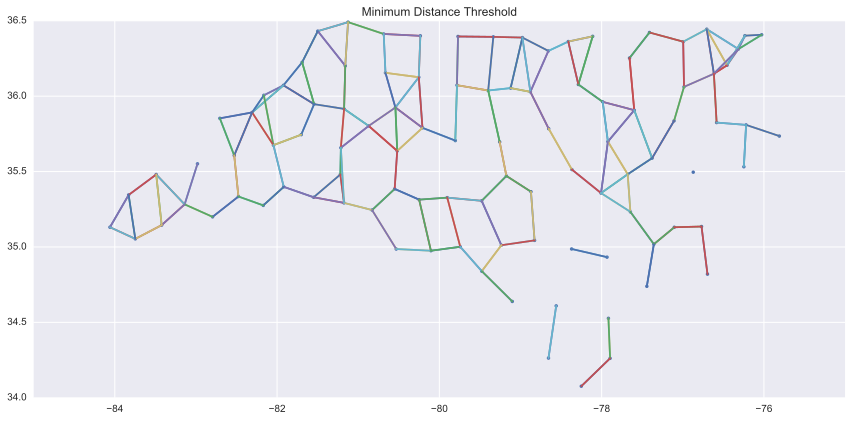

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(centroids[:,0], centroids[:,1], ".")
for k, neighs in mW.neighbors.items():
    for neigh in neighs:
        segment = centroids[[k, neigh]]
        plt.plot(segment[:,0], segment[:,1], '-')
plt.title('Minimum Distance Threshold')
plt.tight_layout()

## Spatial Weights Matrices

* Once list of neighbors is created → Assign spatial weights to relationships
    * Can be binary or variable
    * Don't know much about the spatial process? Stick with binary weights

* Even when values are binary `0/1`
    * Issue of what to do with 'no-neighbor' observations arises
* Binary weighting will assign value of `1` to neighboring features and `0` to all others
    * Used with fixed distance, k-nearest neighbors, and contiguity

## Assigning Weights

* Can also 'row standardize' weights \*
    * Creates proportional weights in cases where unequal number of neighbors
    * Divide each neighbor weight for feature by sum of all neighbor weights

In [20]:
# Simply assign the `transform` property to 'r'
qW.transform = 'r'  # That's it!

</div>
<div class="alert alert-info">
\* Checkout [this workbook](http://darribas.org/gds_scipy16/ipynb_md/03_spatial_weights.html) for more details on this...
</div>

## Examine Spatial Autocorrelation

### Using spatial weights matrices, run statistical tests of spatial autocorrelation \*

<br/>
</div>
<div class="alert alert-info">
\* Checkout [this other workbook](http://darribas.org/gds_scipy16/ipynb_md/04_esda.html) for more details on this stuff!
</div>

### Moran's I

* Moran's $I$ statistic measures spatial autocorrelation
* Moran's $I$ is on the same scale as the correlation coefficient
* The Moran's $I$ equation can be simplified to something similar to the correlation coefficient

### Similar to Correlation

* Correlation is average of the product of the z-scores
    * -- or ++ z-score pairs contribute to *positive* correlation
    * -+ or +- z-score pairs contribute to *negative* correlation
* *Different* from correlation in that *only* considers neighbors
    * Need to modify the statistic...

### Moran’s $I$ vs. Pearson's $r$

Pearson's $r$
<div style="font-size: .5em;">

<br/>
$$
r_{xy} = {\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) \over \sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$
</div>

Moran's $I$
<div style="font-size: .45em;">
$$
I = {n \over \sum_{i=1}^{n} \sum_{j=1}^{n} \mathbf{w_{ij}}} {\sum_{i=1}^{n} \sum_{j=1}^{n} \mathbf{w_{ij}}(x_i - \bar{x})(x_j - \bar{x}) \over \sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{j=1}^{n}(x_j - \bar{x})^2}}
$$
</div>
<p style="font-size: .8em;">Need a weights matrix for $w_{ij}$</p>

## Moran’s $I$

* High values near low values will lead to negative Moran's $I$ statistic.
* High values near high values will lead to positive Moran's $I$ statistic.
* When there is no pattern $\textrm{E}(I) = 0$.

* These properties make it easy to simplify...

## Standardized Moran's $I$

* Computing stadnard z-scores is done via
$$
z = {y_i - \bar{y} \over s^2_y}
$$

* Which leads to a simplified version of Moran's $I$

$$
I_i = {y_i - \bar{y} \over s^2_y} \sum_{j=1}^n w_{ij} {y_j - \bar{y} \over s^2_y}
$$

## Correlation is the...

* Correlation is simply *slope of regression line* through scatterplot of two variables
* **Conceptually** Moran's $I$ simply correlation between each observation and neighbors
    * Can calculate Moran's $I$ by fitting regression through scatter plot...
    * Each value and *weighted average* of neighbors

## Getting Neighbors

* Get neighbors (and their weights) from the weights matrix
* A 'lagged variable'...
    * The 'lag' of variable $X$ for observation $i$ is $w_{ij}X_i$

## Simple Correlation

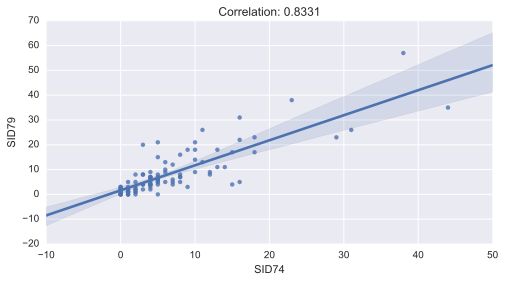

In [21]:
corr = sids.SID74.corr(sids.SID79)
ax = sns.regplot(x="SID74", y="SID79",
                 data=sids).set_title("Correlation: {:.4}".format(corr))

## To calculate Moran's $I$

* We need:
    * A variable of interest
    * A new 'lagged' variable, which measures same thing for neighbors
* We then look at correlation between these variables
* This measures *spatial association*!

## The 'Manual' Way

In [22]:
from statsmodels.formula.api import ols
# Compute lagged variable using queen contiguity weights
lag = ps.lag_spatial(qW, sids.NWBIR79)
# Add lagged variable to data frame
sids["NWBIR79_lag"] = lag
# Fit model of lag versus variable
mod = ols("NWBIR79_lag ~ NWBIR79", data=sids).fit()
print("Level of Autocorrelation: {:.4}".format(mod.params["NWBIR79"]))

Level of Autocorrelation: 0.1497


## Plot It!

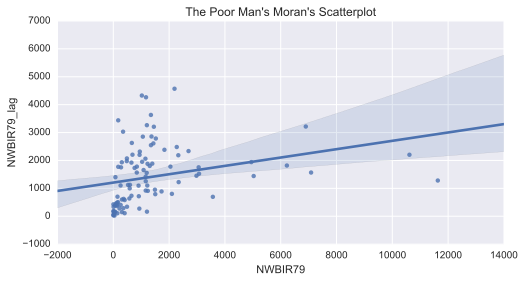

In [23]:
ax = sns.regplot(x="NWBIR79", y="NWBIR79_lag",
                 data=sids).set_title("The Poor Man's Moran's Scatterplot")

## The Easy Way

In [24]:
# Compute Moran's I
moran = ps.Moran(sids.NWBIR79, qW)
print("Moran's I : {:.4}".format(moran.I))

Moran's I : 0.1497


## Plot It!

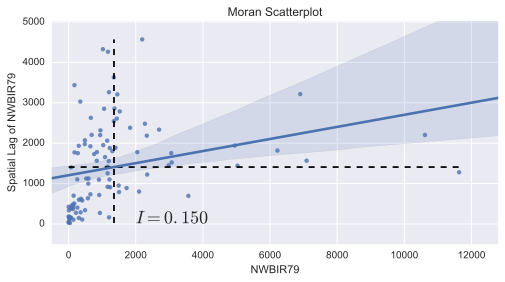

In [25]:
ax = sns.regplot(x="NWBIR79", y="NWBIR79_lag", data=sids)
 # Dashed vert at mean of the last year's PCI
plt.vlines(sids.NWBIR79.mean(), sids.NWBIR79_lag.min(), sids.NWBIR79_lag.max(), linestyle='--')
 # Dashed horizontal at mean of lagged PCI
plt.hlines(sids.NWBIR79_lag.mean(), sids.NWBIR79.min(), sids.NWBIR79.max(), linestyle='--')

# Red line of best fit using global I as slope
plt.text(s='$I = %.3f$' % moran.I, x=2000, y=15, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of NWBIR79')
plt.xlabel('NWBIR79')
plt.xlim(-500, sids.NWBIR79.max()*1.1)
plt.ylim(-500, sids.NWBIR79_lag.max()*1.1)
plt.show()

## Quadrants of Moran Scatterplot

* Each quadrant corresponds to 1 of 4 different types of SA
    * Locations of positive spatial association
        * Q1 & Q3
    * Locations of negative spatial association
        * Q2 & Q4

## What About the Weight Matrix...

* We discussed scale at length (get it)!
    * Argued that how you conceptualize and measure spatial questions...
    * has impact on the results of an analysis
* Results are often scale dependent
* Scale dependence begs a host of questions about finding the 'right' or best scale
    *  We'll explore two tools to help us gain insight into scale:
        * Correllogram
        * Variogram

## Variogram and Correlogram

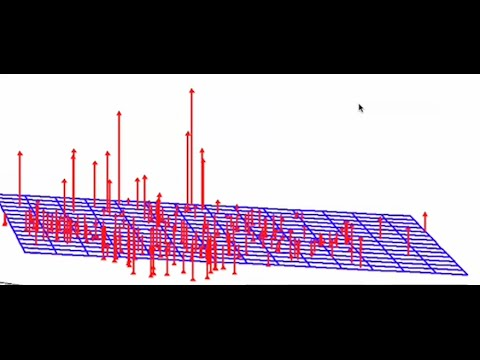

In [26]:
display(YouTubeVideo("XhsvHhusa9E"))